<a href="https://colab.research.google.com/github/vivek-a81/EVA6/blob/main/Session12/S12CIFAR10transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MittalNeha/vision_pytorch
!pip install --upgrade albumentations

Cloning into 'vision_pytorch'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 160 (delta 72), reused 39 (delta 12), pack-reused 0
Receiving objects: 100% (160/160), 50.70 KiB | 5.07 MiB/s, done.
Resolving deltas: 100% (72/72), done.
     |████████████████████████████████| 98 kB 5.0 MB/s 
     |████████████████████████████████| 37.1 MB 45 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from torchsummary import summary

import matplotlib.pyplot as plt
import numpy as np

from vision_pytorch.dataloaders import CIFAR10
from vision_pytorch.models.spatialtransformer import SpatialTransNet
from vision_pytorch.main import fit_model, save_model
from vision_pytorch.utils import plotting_functions
plt.ion()   # interactive mode

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

print("CUDA Available:", use_cuda)
print("Selected Device:", device)
SEED = 1
# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=256
else:
    BATCH_SIZE=32
print("Batch Size", BATCH_SIZE)

CUDA Available: True
Selected Device: cuda
Batch Size 256


In [5]:
augs = A.Compose([
    A.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784)), 
    ToTensorV2()
])

train_loader, test_loader = CIFAR10.get_train_test_loaders(augs, augs, BATCH_SIZE)


Extracting /content/data/cifar-10-python.tar.gz to /content/data
Files already downloaded and verified
Downloaded CIFAR10 to /content/data
Train & Test Loaders Created


In [6]:
model = SpatialTransNet(num_classes=10).to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]           1,184
         MaxPool2d-2            [-1, 8, 13, 13]               0
              ReLU-3            [-1, 8, 13, 13]               0
            Conv2d-4             [-1, 10, 9, 9]           2,010
         MaxPool2d-5             [-1, 10, 4, 4]               0
              ReLU-6             [-1, 10, 4, 4]               0
            Linear-7                   [-1, 32]           5,152
              ReLU-8                   [-1, 32]               0
            Linear-9                    [-1, 6]             198
           Conv2d-10           [-1, 10, 28, 28]             760
           Conv2d-11           [-1, 20, 10, 10]           5,020
        Dropout2d-12           [-1, 20, 10, 10]               0
           Linear-13                   [-1, 50]          25,050
           Linear-14                   

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4044: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See 

In [6]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

net, history = fit_model(
    net=model, device=device,
    train_loader=train_loader, test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    NUM_EPOCHS=50
)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 1 (LR: 0.01)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4044: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.8242, Accuracy: 3601/10000 (36.01%)

EPOCH: 2 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.6538, Accuracy: 4124/10000 (41.24%)

EPOCH: 3 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.5693, Accuracy: 4300/10000 (43.00%)

EPOCH: 4 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.5177, Accuracy: 4634/10000 (46.34%)

EPOCH: 5 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.4614, Accuracy: 4788/10000 (47.88%)

EPOCH: 6 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.4359, Accuracy: 4901/10000 (49.01%)

EPOCH: 7 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3703, Accuracy: 5109/10000 (51.09%)

EPOCH: 8 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3691, Accuracy: 5198/10000 (51.98%)

EPOCH: 9 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3494, Accuracy: 5230/10000 (52.30%)

EPOCH: 10 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3410, Accuracy: 5282/10000 (52.82%)

EPOCH: 11 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3133, Accuracy: 5288/10000 (52.88%)

EPOCH: 12 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2980, Accuracy: 5423/10000 (54.23%)

EPOCH: 13 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2770, Accuracy: 5507/10000 (55.07%)

EPOCH: 14 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2712, Accuracy: 5501/10000 (55.01%)

EPOCH: 15 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2631, Accuracy: 5527/10000 (55.27%)

EPOCH: 16 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2966, Accuracy: 5415/10000 (54.15%)

EPOCH: 17 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2576, Accuracy: 5616/10000 (56.16%)

EPOCH: 18 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2486, Accuracy: 5637/10000 (56.37%)

EPOCH: 19 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2334, Accuracy: 5684/10000 (56.84%)

EPOCH: 20 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2390, Accuracy: 5688/10000 (56.88%)

EPOCH: 21 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2293, Accuracy: 5686/10000 (56.86%)

EPOCH: 22 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2282, Accuracy: 5773/10000 (57.73%)

EPOCH: 23 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2138, Accuracy: 5708/10000 (57.08%)

EPOCH: 24 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2200, Accuracy: 5713/10000 (57.13%)

EPOCH: 25 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2124, Accuracy: 5767/10000 (57.67%)

EPOCH: 26 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1898, Accuracy: 5883/10000 (58.83%)

EPOCH: 27 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1914, Accuracy: 5813/10000 (58.13%)

EPOCH: 28 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2923, Accuracy: 5454/10000 (54.54%)

EPOCH: 29 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2050, Accuracy: 5886/10000 (58.86%)

EPOCH: 30 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1831, Accuracy: 5840/10000 (58.40%)

EPOCH: 31 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2081, Accuracy: 5791/10000 (57.91%)

EPOCH: 32 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1958, Accuracy: 5876/10000 (58.76%)

EPOCH: 33 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1854, Accuracy: 5822/10000 (58.22%)

EPOCH: 34 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2637, Accuracy: 5640/10000 (56.40%)

EPOCH: 35 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2054, Accuracy: 5844/10000 (58.44%)

EPOCH: 36 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2145, Accuracy: 5745/10000 (57.45%)

EPOCH: 37 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1695, Accuracy: 5916/10000 (59.16%)

EPOCH: 38 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1951, Accuracy: 5806/10000 (58.06%)

EPOCH: 39 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2438, Accuracy: 5583/10000 (55.83%)

EPOCH: 40 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1630, Accuracy: 6061/10000 (60.61%)

EPOCH: 41 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1569, Accuracy: 5998/10000 (59.98%)

EPOCH: 42 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2076, Accuracy: 5833/10000 (58.33%)

EPOCH: 43 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1455, Accuracy: 6032/10000 (60.32%)

EPOCH: 44 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1558, Accuracy: 5925/10000 (59.25%)

EPOCH: 45 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.4079, Accuracy: 4982/10000 (49.82%)

EPOCH: 46 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2168, Accuracy: 5763/10000 (57.63%)

EPOCH: 47 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1460, Accuracy: 5992/10000 (59.92%)

EPOCH: 48 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.4068, Accuracy: 4923/10000 (49.23%)

EPOCH: 49 (LR: 0.01)


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1414, Accuracy: 5983/10000 (59.83%)

EPOCH: 50 (LR: 0.01)


Batch_id=195 Loss=1.36774 Accuracy=51.23%: 100%|██████████| 196/196 [00:08<00:00, 23.78it/s]



Test set: Average loss: 1.1450, Accuracy: 6018/10000 (60.18%)



In [43]:
save_model(model, 50, optimizer, '/content/drive/MyDrive/EVA6/Session12/model_1.pt')

In [8]:
model.load_state_dict(torch.load('/content/drive/MyDrive/EVA6/Session12/model_1.pt')['state_dict'])

<All keys matched successfully>

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4044: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


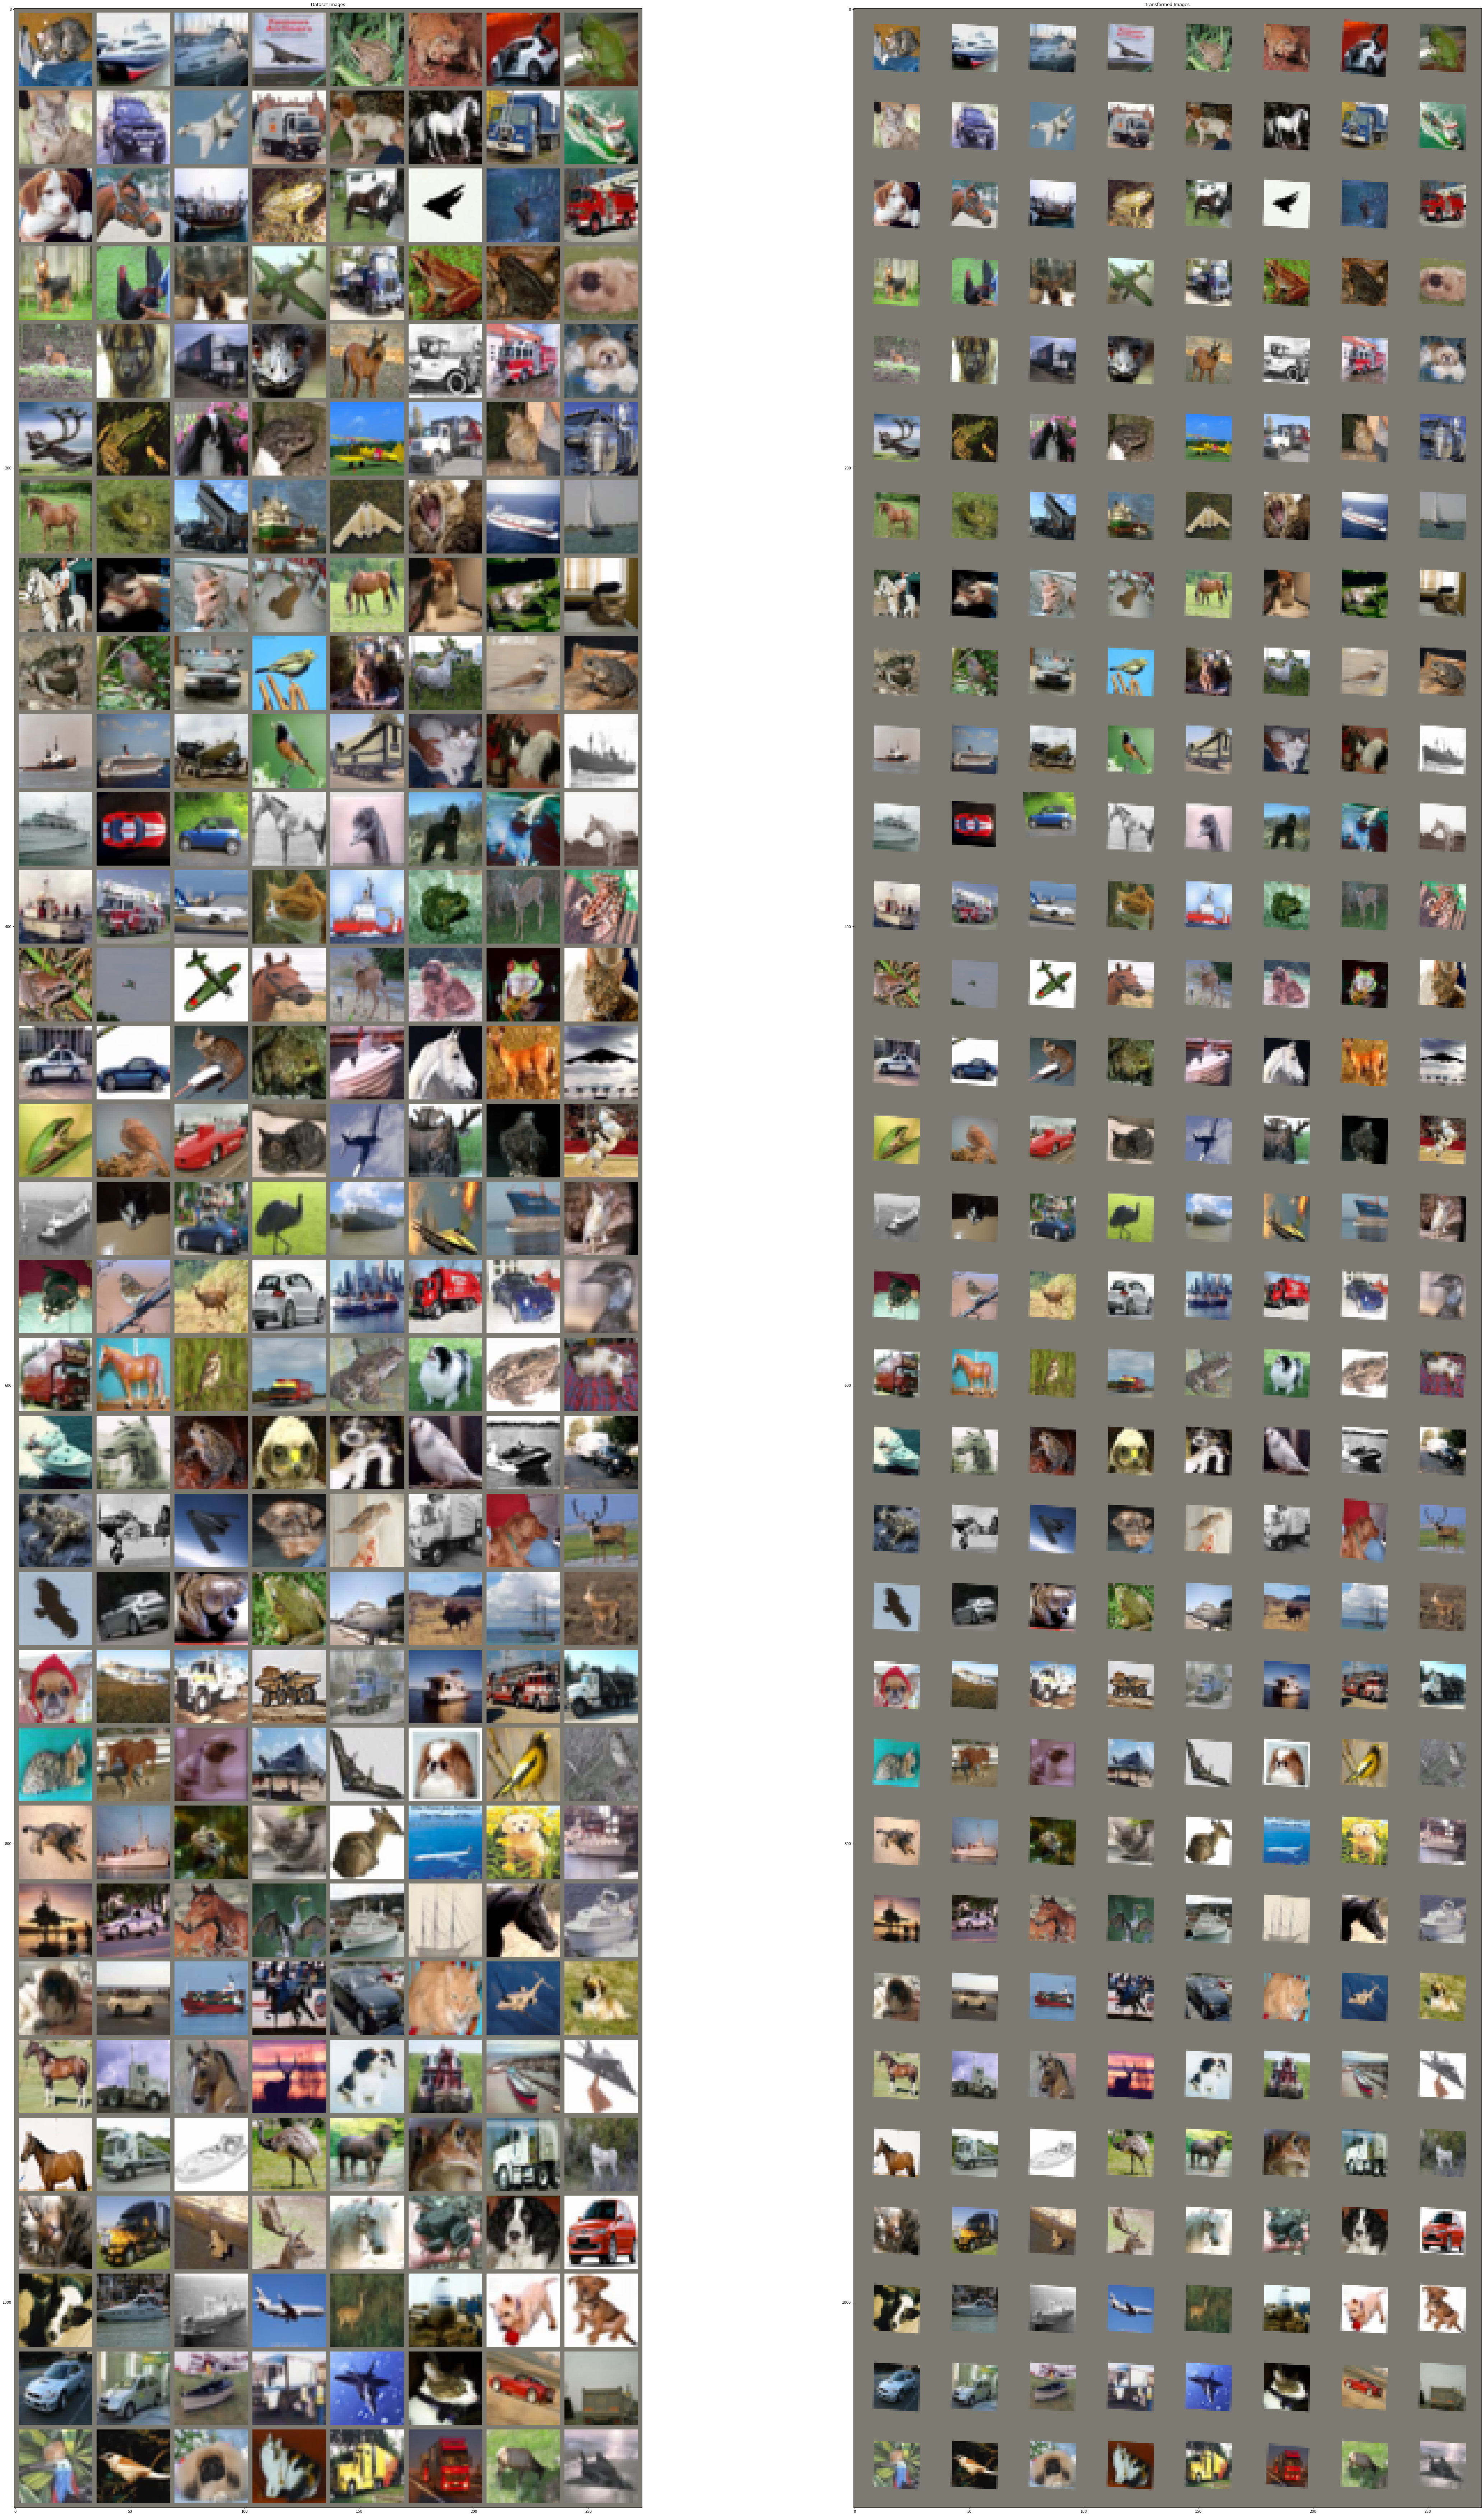

In [9]:
dts_mean = np.array([0.49139968, 0.48215841, 0.44653091])
dts_std = np.array([0.24703223, 0.24348513, 0.26158784])

plotting_functions.visualize_stn(model, test_loader, device,dts_mean, dts_std)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4044: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


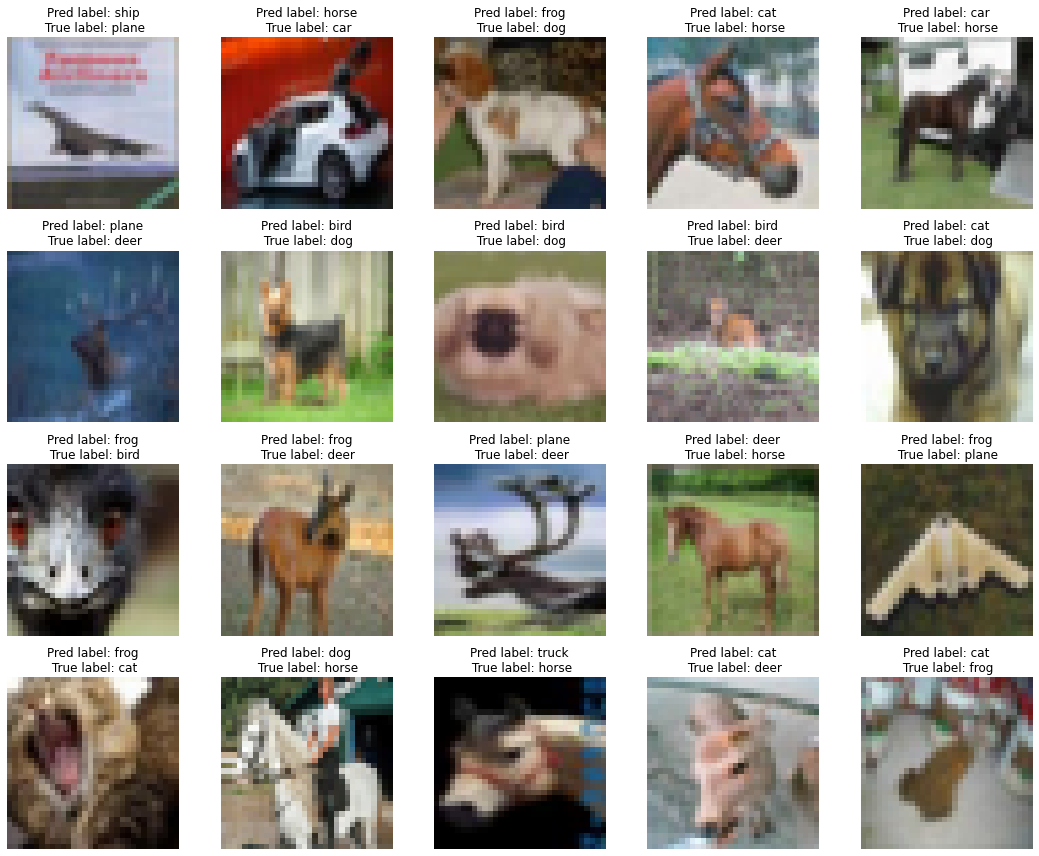

In [10]:
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plotting_functions.plot_misclassified(model, test_loader, classes, device, dts_mean, dts_std)